In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt  
import os, shutil

In [2]:
dataset = "D:/PIAIC AI/KaggleDataset/flowers-recognition/flowers/Assignment"

In [3]:
create_dir = "D:/PIAIC AI/KaggleDataset/flowers-recognition/flowers/Assignment/Daisy_vs_Dandelion_CNN"
os.mkdir(create_dir)

In [4]:
# Directories for the training, validation, and test splits

train_dir = os.path.join(create_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(create_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(create_dir, 'test')
os.mkdir(test_dir)

In [5]:
# Directory with training daisy pictures

train_daisy_dir = os.path.join(train_dir, 'daisy')
os.mkdir(train_daisy_dir)

In [6]:
# Directory with training dandelion pictures

train_dandelion_dir = os.path.join(train_dir, 'dandelion')
os.mkdir(train_dandelion_dir)

In [7]:
# Directory with validation daisy pictures

validation_daisy_dir = os.path.join(validation_dir, 'daisy')
os.mkdir(validation_daisy_dir)

In [8]:
# Directory with validation dandelion pictures

validation_dandelion_dir = os.path.join(validation_dir, 'dandelion')
os.mkdir(validation_dandelion_dir)

In [9]:
# Directory with test daisy pictures

test_daisy_dir = os.path.join(test_dir, 'daisy')
os.mkdir(test_daisy_dir)

In [10]:
# Directory with test dandelion pictures

test_dandelion_dir = os.path.join(test_dir, 'dandelion')
os.mkdir(test_dandelion_dir)

In [11]:
# Copies the first 400 daisy images to train_daisy_dir

fnames = ['daisy.{}.jpg'.format(i) for i in range(1,401)]
for fname in fnames:
    src = os.path.join(dataset, fname)
    dst = os.path.join(train_daisy_dir, fname)
    shutil.copyfile(src, dst)
    
    
# Copies the 150 daisy images to validation_daisy_dir
fnames = ['daisy.{}.jpg'.format(i) for i in range(401, 551)]
for fname in fnames:
    src = os.path.join(dataset, fname)
    dst = os.path.join(validation_daisy_dir, fname)
    shutil.copyfile(src, dst)
    
    
#  Copies the next 175 daisy images to test_daisy_dir

fnames = ['daisy.{}.jpg'.format(i) for i in range(551, 701)]
for fname in fnames:
    src = os.path.join(dataset, fname)
    dst = os.path.join(test_daisy_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
# Copies the first 400 dandelion images to train_dandelion_dir

fnames = ['dandelion.{}.jpg'.format(i) for i in range(1, 401)]
for fname in fnames:
    src = os.path.join(dataset, fname)
    dst = os.path.join(train_dandelion_dir, fname)
    shutil.copyfile(src, dst)
    
# Copies the next 150 dandelion images to validation_dandelion_dir    

fnames = ['dandelion.{}.jpg'.format(i) for i in range(401, 551)]
for fname in fnames:
    src = os.path.join(dataset, fname)
    dst = os.path.join(validation_dandelion_dir, fname)
    shutil.copyfile(src, dst)
    
# Copies the next 150 dandelion images to test_dandelion_dir    

fnames = ['dandelion.{}.jpg'.format(i) for i in range(551, 701) ]
for fname in fnames:
    src = os.path.join(dataset, fname)
    dst = os.path.join(test_dandelion_dir, fname)
    shutil.copyfile(src, dst)

In [13]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [14]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [15]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


validation_generator = test_datagen.flow_from_directory(
        validation_dir,
         target_size=(150, 150),
         batch_size=20,
         class_mode='binary')

Found 800 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [16]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/30
100/100 [==============================] - 81s 808ms/step - loss: 0.6164 - acc: 0.6480 - val_loss: 0.4607 - val_acc: 0.7520
Epoch 2/30
100/100 [==============================] - 75s 754ms/step - loss: 0.4979 - acc: 0.7655 - val_loss: 0.5600 - val_acc: 0.6670
Epoch 3/30
100/100 [==============================] - 73s 731ms/step - loss: 0.4423 - acc: 0.8025 - val_loss: 0.2225 - val_acc: 0.8590
Epoch 4/30
100/100 [==============================] - 74s 740ms/step - loss: 0.3900 - acc: 0.8290 - val_loss: 0.3230 - val_acc: 0.8730
Epoch 5/30
100/100 [==============================] - 75s 753ms/step - loss: 0.3261 - acc: 0.8625 - val_loss: 0.1470 - val_acc: 0.8360
Epoch 6/30
100/100 [==============================] - 77s 772ms/step - loss: 0.3141 - acc: 0.8730 - val_loss: 0.2468 - val_acc: 0.8430
Epoch 7/30
100/100 [==============================] - 78s 778ms/step - loss: 0.2689 - acc: 0.8880 - val_loss: 0.2727 - val_acc: 0.8710
Epoch 8/30
100/100 [==============================] - 7

In [17]:
# Saving the model

model.save('daisy_vs_dandelion_using_cnn.h5')

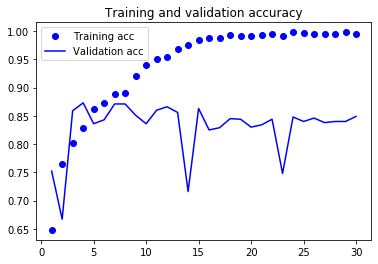

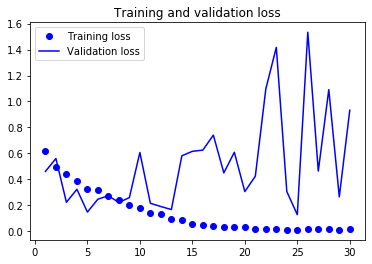

In [18]:
# Displaying curves of loss and accuracy during training

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [19]:
# Setting up a data augmentation configuration via ImageDataGenerator

datagen = ImageDataGenerator(
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [20]:
# Defining a new convnet that includes dropout

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [ ]:
# Training the convnet using data-augmentation generators

train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(150, 150),
            batch_size=32,
            class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')

history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

Found 800 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 124s 1s/step - loss: 0.6386 - acc: 0.6269 - val_loss: 0.6648 - val_acc: 0.5933
Epoch 2/100
100/100 [==============================] - 122s 1s/step - loss: 0.5779 - acc: 0.7022 - val_loss: 0.3987 - val_acc: 0.7133
Epoch 3/100
100/100 [==============================] - 122s 1s/step - loss: 0.5206 - acc: 0.7541 - val_loss: 0.2920 - val_acc: 0.8333
Epoch 4/100
100/100 [==============================] - 133s 1s/step - loss: 0.4746 - acc: 0.7684 - val_loss: 0.5639 - val_acc: 0.8367
Epoch 5/100
100/100 [==============================] - 134s 1s/step - loss: 0.4578 - acc: 0.7891 - val_loss: 0.7406 - val_acc: 0.8533
Epoch 6/100
100/100 [==============================] - 150s 1s/step - loss: 0.4324 - acc: 0.8087 - val_loss: 0.3283 - val_acc: 0.8567
Epoch 7/100
100/100 [==============================] - 149s 1s/step - loss: 0.4134 - acc: 0.8153 - val_loss: 0.160

100/100 [==============================] - 150s 1s/step - loss: 0.0990 - acc: 0.9603 - val_loss: 0.4673 - val_acc: 0.8867
Epoch 62/100
100/100 [==============================] - 149s 1s/step - loss: 0.1125 - acc: 0.9569 - val_loss: 0.3301 - val_acc: 0.8667
Epoch 63/100
100/100 [==============================] - 149s 1s/step - loss: 0.1093 - acc: 0.9566 - val_loss: 0.1993 - val_acc: 0.8800
Epoch 64/100
100/100 [==============================] - 499s 5s/step - loss: 0.1186 - acc: 0.9550 - val_loss: 0.0918 - val_acc: 0.8533
Epoch 65/100
100/100 [==============================] - 150s 1s/step - loss: 0.1028 - acc: 0.9603 - val_loss: 0.3270 - val_acc: 0.8267
Epoch 66/100
100/100 [==============================] - 150s 1s/step - loss: 0.0992 - acc: 0.9572 - val_loss: 0.2215 - val_acc: 0.8867
Epoch 67/100
100/100 [==============================] - 149s 1s/step - loss: 0.1013 - acc: 0.9588 - val_loss: 0.5483 - val_acc: 0.8467
Epoch 68/100
100/100 [==============================] - 149s 1s/step

In [ ]:
model.save('daisy_vs_dandelion_using_cnn_2.h5')

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()